In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

from Assignment_1.src.algorithms.genetic import GeneticAlgorithm
from Assignment_1.src.runner import Runner
from Assignment_1.src.logging import Logger

path = '/home/michal/studia/SI/artificial_intelligence_pwr/Assignment_1/data/berlin52.tsp'

config = {
    'population_size': 100,
    'generations': 100,
    'crossover_probability': 0.5,
    'mutation_probability': 0.03,
    'tournament_size': 10
}


In [2]:
import pandas as pd
import altair as alt

def plot(values, max_x):
    df = pd.DataFrame(values).reset_index()

    base = alt.Chart(df).mark_line().encode(
        alt.X('index', scale=alt.Scale(domain=(0, max_x)))
    )
    return alt.layer(
        base.mark_line(color='green').encode(y='best'),
        base.mark_line(color='blue').encode(y='average'),
        base.mark_line(color='red').encode(y='worst'),
    ).properties(
        width=600,
        height=300
    )

# # runner = Runner(path, Logger('berlin11', [update_progress]))
# # runner.run(GeneticAlgorithm(config))
# plot(runner.logger.values)

In [13]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
from Assignment_1.settings import DATA_PATH
from glob import glob
from pathlib import Path

path = Path(DATA_PATH)
names_files = {f.stem: f for f in path.glob('**/*')}

problems = widgets.Dropdown(
    options=names_files.keys(),
    description='Problem'
)


population_size = widgets.IntText(
    value=100,
    description='Population size',
    style={'description_width': 'initial'}
)

generations = widgets.IntText(
    value=100,
    description='Number of generations',
    style={'description_width': 'initial'}
)

tournament_size = widgets.IntText(
    value=5,
    description='Tournament size',
    style={'description_width': 'initial'}
)


crossover_probability = widgets.BoundedFloatText(
    value=0.7,
    min=0.0,
    max=1.0,
    description='Crossover probability',
    style={'description_width': 'initial'}
)

mutation_probability = widgets.BoundedFloatText(
    value=0.1,
    min=0.0,
    max=1.0,
    description='Mutation probability',
    style={'description_width': 'initial'}
)

debug_view = widgets.Output(layout={'border': '1px solid black'})
plot_out = widgets.Output()
progress_bar = widgets.IntProgress(min=0, max=config['generations'])


def update_progress(logger):
    progress_bar.value += 1
    
def plot_fitness(logger):
    with plot_out:
        if (len(logger.values) % 5) == 0:
            plot_out.clear_output()
            display.display(plot(logger.values, generations.value))
    
@debug_view.capture(clear_output=True)
def run(event):
    config = {
        'population_size': population_size.value,
        'generations': generations.value,
        'crossover_probability': crossover_probability.value,
        'mutation_probability': mutation_probability.value,
        'tournament_size': tournament_size.value
    }
    print(config)
    progress_bar.value = 0
    progress_bar.max = config['generations']
    path = names_files[problems.value]
    runner = Runner(path, Logger('berlin11', [update_progress, plot_fitness]))
    runner.run(GeneticAlgorithm(config))
        

run_btn = widgets.Button(description='Run algorithm')
run_btn.on_click(run)
run_btn

    
panel = widgets.VBox(children=[
    problems, population_size, generations, tournament_size, crossover_probability, mutation_probability, run_btn, progress_bar,
    
])

tab2 = widgets.VBox()

tab1 = widgets.HBox(children=[panel, plot_out],  layout=widgets.Layout(min_height='400px'))
tabs = widgets.Tab(children=[tab1, tab2])
tabs
# display(population_size, generations, tournament_size, crossover_probability, mutation_probability, run_algorithm)

In [8]:
debug_view

Output(layout=Layout(border='1px solid black'), outputs=({'name': 'stdout', 'text': "{'population_size': 400, …

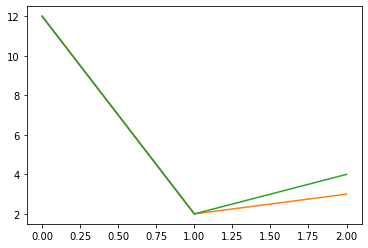

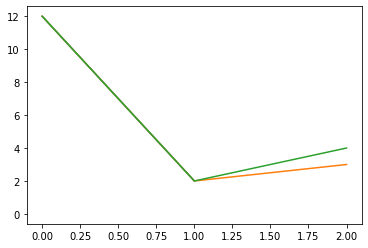

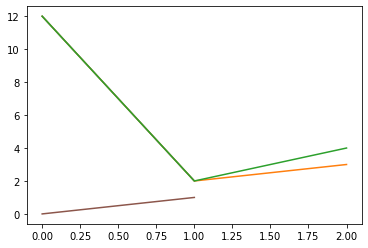

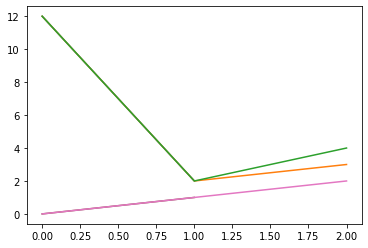

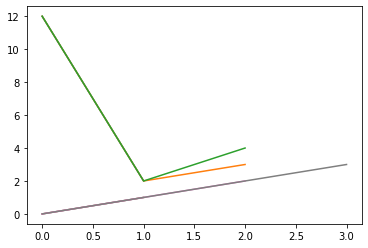

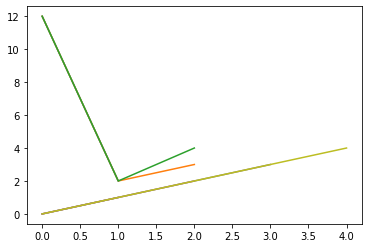

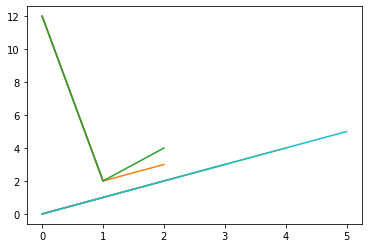

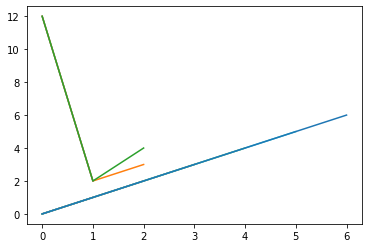

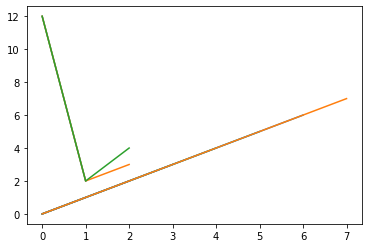

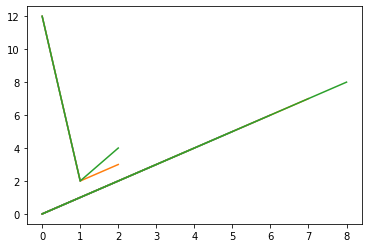

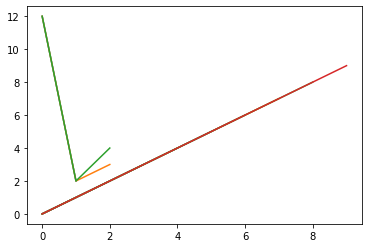

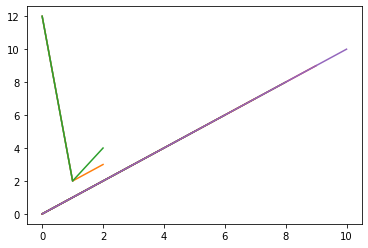

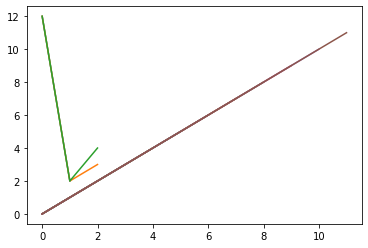

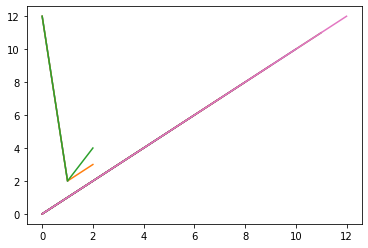

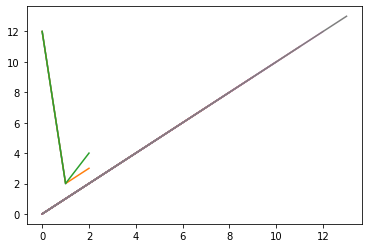

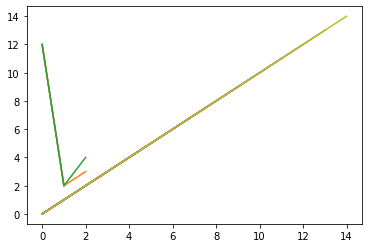

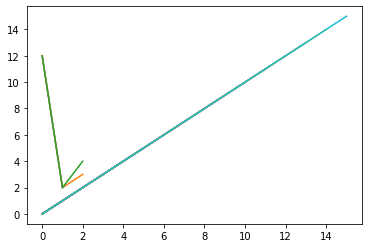

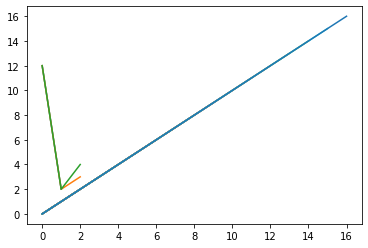

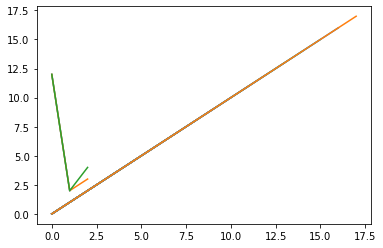

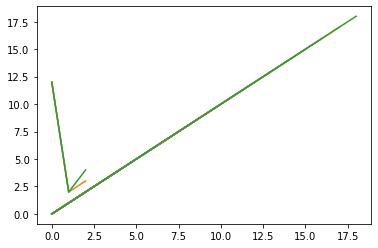

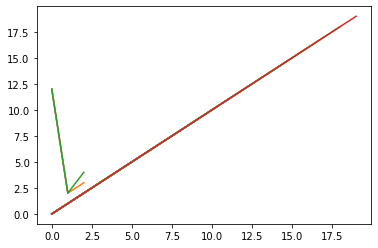

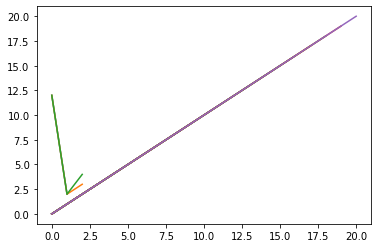

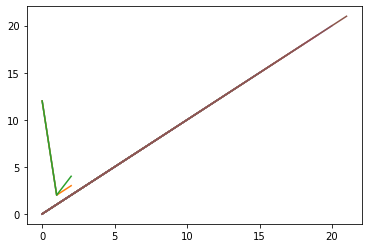

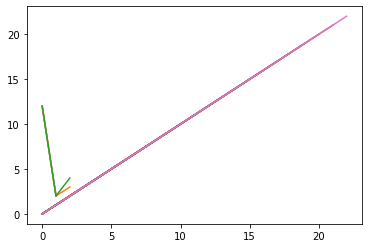

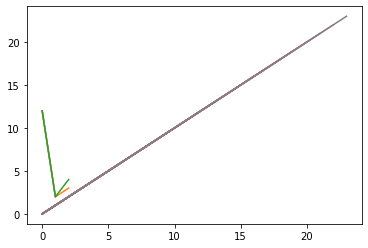

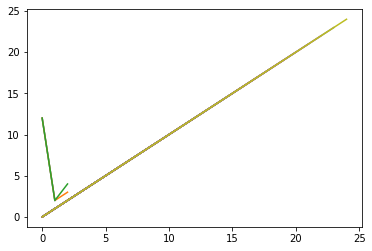

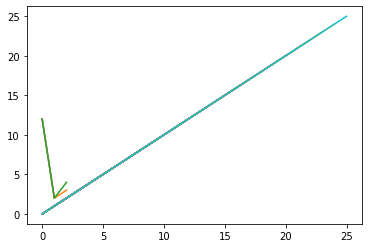

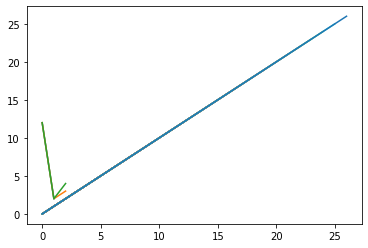

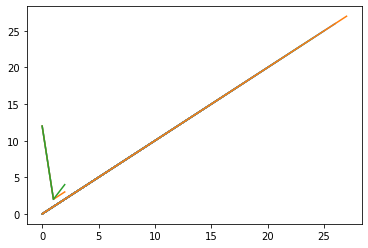

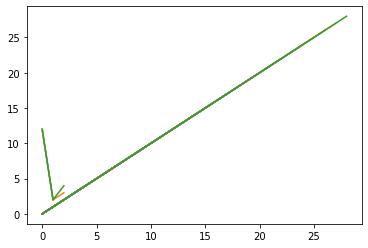

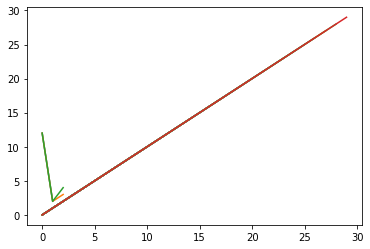

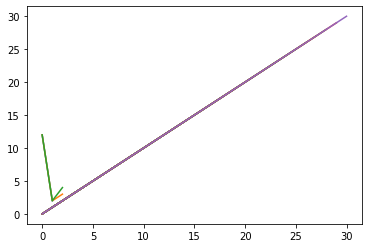

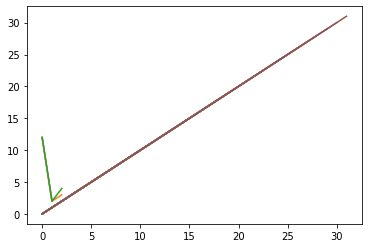

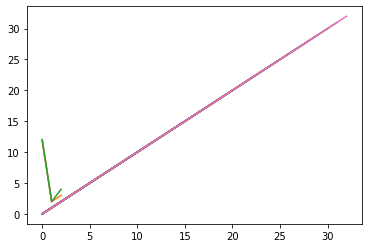

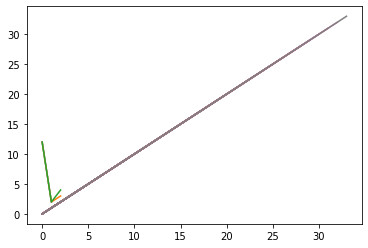

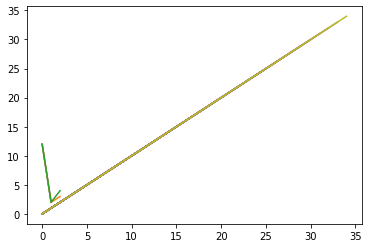

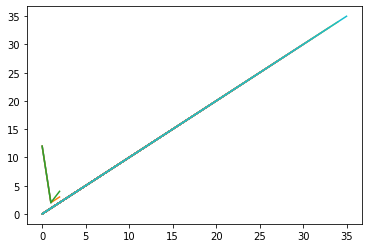

KeyboardInterrupt: 

In [45]:
run

In [19]:
j = 1
def animate(i):
    plt.cla()
    plt.plot(j)
    
anim = FuncAnimation(plt.gcf(), animate, interval=1000)
# plt.show()

<Figure size 432x288 with 0 Axes>

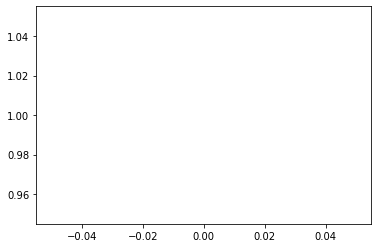

In [20]:
display.HTML(anim.to_jshtml())